# Importar librerías

- Astropy
- pandas
- numpy


In [1]:
from astropy.io import fits
import numpy as np
import datetime
import pandas as pd
import glob #para linux
from glob import os #para windows
import matplotlib.pyplot as plt
import subprocess
from astropy.visualization import (HistEqStretch, 
                                   simple_norm, 
                                   ImageNormalize, 
                                   imshow_norm, 
                                   MinMaxInterval, 
                                   LogStretch)
from sklearn import preprocessing
import matplotlib.animation as animation
from scipy import ndimage, misc, interpolate
from scipy.optimize import curve_fit
#librerias para iterar colores xd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.cm as mplcm
import matplotlib.colors as colors
#dar formato a las fechas en formato datatime
from matplotlib import dates as mpl_dates
%matplotlib inline

In [2]:
pathToFiles = 'DATA'
orderedList = sorted(glob.glob(os.path.join(pathToFiles, '*.fts')))
contador=0
for filename in orderedList:
    contador+=1
print("\nExisten {} archivos fts".format(contador))


Existen 46 archivos fts


In [3]:
# Obtener lista de datos que son 2048x2048
listaDatos = []
for filename in orderedList:
  hdulist = fits.open(filename)
  data = hdulist[0].data
  hdulist.close
  if data.shape == (2048, 2048):
    listaDatos.append(filename)
print("\nDe los cuales {} son  de tamaño 2048 x 2048".format(len(listaDatos)))



De los cuales 45 son  de tamaño 2048 x 2048


In [4]:
hdulist1 = fits.open(listaDatos[0])
headerList = hdulist1[0].header
hdulist1.close()

maph=pd.DataFrame(columns=headerList)
maph

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE-OBS,FILEORIG,SEB_PROG,SYNC,...,FPSDAS3,FPSDAQ1,FPSDAQ2,FPSDAQ3,DATAMDN,HISTORY,HISTORY,HISTORY,HISTORY,HISTORY


In [5]:
cel = []
for i in range(len(listaDatos)):
    hdulist1 = fits.open(listaDatos[i])
    headerList = hdulist1[0].header
    hdulist1.close()
    for headerInplace in headerList:
        cel.append(headerList[headerInplace])
    maph.loc[i]=cel
    cel=[]


In [6]:
maph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Columns: 253 entries, SIMPLE to HISTORY
dtypes: bool(9), float64(88), int64(92), object(64)
memory usage: 86.5+ KB


In [7]:
maph.head()

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE-OBS,FILEORIG,SEB_PROG,SYNC,...,FPSDAS3,FPSDAQ1,FPSDAQ2,FPSDAQ3,DATAMDN,HISTORY,HISTORY,HISTORY,HISTORY,HISTORY
0,True,16,2,2048,2048,True,2018-11-10T10:24:00.005,IB10028D.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
1,True,16,2,2048,2048,True,2018-11-10T10:54:00.005,IB1002C9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
2,True,16,2,2048,2048,True,2018-11-10T11:24:00.005,IB1002GE.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
3,True,16,2,2048,2048,True,2018-11-10T11:54:00.005,IB1002K9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
4,True,16,2,2048,2048,True,2018-11-10T12:24:00.005,IB1002NW.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."


In [8]:
expTime=maph.EXPTIME
mExpTime=np.mean(expTime)
mExpTime

6.003693466666666

In [9]:
stdExpTime=np.std(maph.EXPTIME)
stdExpTime

7.744819056681542e-06

In [10]:
#maph = maph[(maph.EXPTIME >= (mExpTime - stdExpTime)) & (maph.EXPTIME <= (mExpTime + stdExpTime))]
maph = maph[(maph.EXPTIME >= (mExpTime - 1.5)) & (maph.EXPTIME <= (mExpTime + 1.5))]
tama = len(maph)
tama

45

In [11]:
listaDatosFiltrados = []
for fit_index in maph.index:
    listaDatosFiltrados.append(listaDatos[fit_index])
len(listaDatosFiltrados)

45

In [12]:
mapa = []
for fit in listaDatosFiltrados:
    hdulist = fits.open(fit)
    datatemp = hdulist[0].data
    hdulist.close()
    
    mapa.append(datatemp)

In [13]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [14]:
map_s = ndimage.uniform_filter(mapa, size=3, mode='reflect')

In [15]:
mitad=1 #esto es para elegir el tamaño de la imagen 2 -> 512# 1 -> 1024
xc=maph.loc[0].CRPIX1/mitad
yc=maph.loc[0].CRPIX2/mitad
print("xc = {}".format(xc))
print("yc = {}".format(yc))

xc = 1027.0
yc = 1028.2


In [16]:
for i in maph:
    if i == 'R_SUN':
        print("R_SUN existe")
    elif i == 'RSUN':
        print("RSUN existe")

RSUN existe


In [17]:
for header in maph:
    if header == 'R_SUN':
        r0=maph.loc[0].R_SUN/(maph.loc[0].CDELT1*mitad)
    elif header == 'RSUN':
        r0=maph.loc[0].RSUN/(maph.loc[0].CDELT1*mitad)

r0_20=20.*r0
r0_19=19.*r0
r0_15=15.*r0
r0_10=10.*r0

In [18]:
print("r0_20 = {}".format(r0_20))
print("r0_19 = {}".format(r0_19))
print("r0_15 = {}".format(r0_15))
print("r0_10 = {}".format(r0_10))

r0_20 = 1364.4457716190345
r0_19 = 1296.2234830380828
r0_15 = 1023.3343287142759
r0_10 = 682.2228858095173


In [19]:
df_tiempo=pd.to_datetime(maph['DATE-OBS'])
df_tiempo.head()

0   2018-11-10 10:24:00.005
1   2018-11-10 10:54:00.005
2   2018-11-10 11:24:00.005
3   2018-11-10 11:54:00.005
4   2018-11-10 12:24:00.005
Name: DATE-OBS, dtype: datetime64[ns]

In [20]:
tiempos = [maph['DATE-OBS']]
header = ["DATE-OBS"]
df_tiempo = pd.concat(tiempos, axis = 1, keys = header)
df_tiempo.head()

,DATE-OBS
0,2018-11-10T10:24:00.005
1,2018-11-10T10:54:00.005
2,2018-11-10T11:24:00.005
3,2018-11-10T11:54:00.005
4,2018-11-10T12:24:00.005


In [21]:
tiempos=pd.to_datetime(df_tiempo['DATE-OBS'])
t0 = tiempos[0] # Esto fallará si se filtro el FITfile con el indice 0
delta = []
for celda in tiempos:
    delta.append((celda - t0).total_seconds())
#delta

In [22]:
df_tiempo['SECONDS'] = delta
df_tiempo.head()

,DATE-OBS,SECONDS
0,2018-11-10T10:24:00.005,0.0
1,2018-11-10T10:54:00.005,1800.0
2,2018-11-10T11:24:00.005,3600.0
3,2018-11-10T11:54:00.005,5400.0
4,2018-11-10T12:24:00.005,7200.0


In [23]:
dx = maph.loc[0]['CDELT1']*1
dx

14.6999998093

In [24]:
#angulo=79.0
n_puntos=100
ang_inc=3.0
#ang_inc=0.5
print('centro = {}, {}'.format(xc,yc))

centro = 1027.0, 1028.2


In [25]:
if maph.loc[0].DETECTOR == 'COR2': #para stereo
    rrin=3
    rrfin=15
else:
    rrin=6
    rrfin=15
rrin

3

In [26]:
def setAngle(angulo, ang_inc, gap):
    gap_angle = np.arange(gap*(-1),gap+1)
    rr=rrt=np.zeros((1+gap*2,2,n_puntos),dtype=int)
    PA_m = angulo + 90
    rsol = r0
    index = np.arange(100)
    rads = np.linspace(rrin,rrfin,100)
    radios = np.zeros(n_puntos)
    for j in gap_angle:
        for i in index:
            rd = rads[i]
            radios[i] = rd
            radio=rsol * rd
            teta = (PA_m + ang_inc * j)*np.pi/180
            x = radio * np.cos(teta) + xc
            y = radio * np.sin(teta) + yc
            if x < 0 or y < 0:
                print(i, x, y)
            rr[j+gap][0][i]=x
            rr[j+gap][1][i]=y
    return rr

In [27]:
#rr = setAngle(79,0.5,5)
rr = setAngle(80,3,5)
print(rr.shape)

(11, 2, 100)


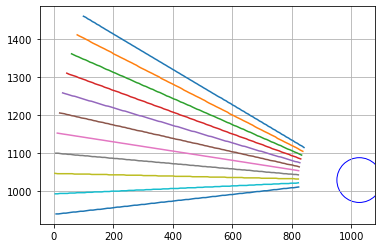

In [28]:
for i in np.arange(len(rr)):
    plt.plot(rr[i,0,:],rr[i,1,:])
#plt.xlim([0,2040])
#plt.ylim([750,1600])
plt.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='b')
plt.grid()
plt.show()

In [29]:
#librerias para iterar colores xd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.cm as mplcm
import matplotlib.colors as colors
#dar formato a las fechas en formato datatime
from matplotlib import dates as mpl_dates

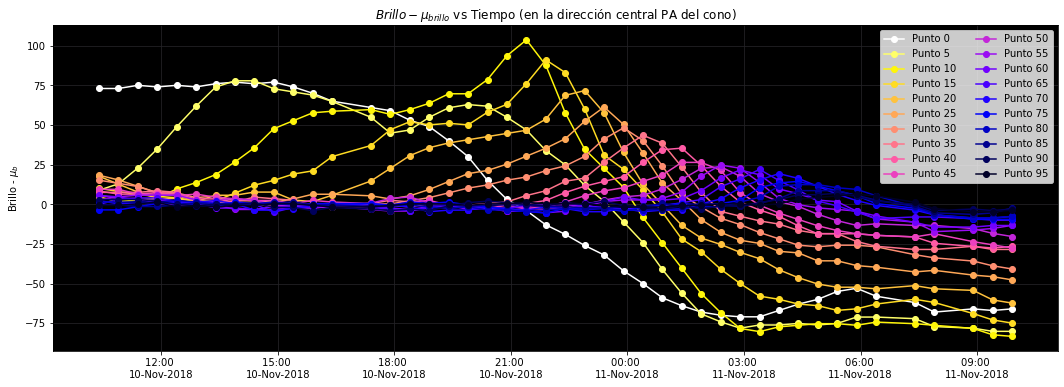

In [30]:
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}

NUM_COLORS = 100
cm = plt.get_cmap('gnuplot2_r')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

for radio in range(0,n_puntos,5):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        map = map_s[indice]
        #valorRadioCentral = np.append(valorRadioCentral,[map[rr[len(rr)//2][1][radio]][[rr[len(rr)//2][0][radio]]]])
        valorRadioCentral = np.append(valorRadioCentral, [ map[ rr[len(rr)//2, 1, radio], rr[len(rr)//2, 0, radio] ] ])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    #valorRadioCentral = movingaverage(valorRadioCentral, 3)
    
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    #iteración de colores
    ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    ax.plot_date(tiempos, dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    #plt.xticks(rotation=45,  ha='right')

date_format = mpl_dates.DateFormatter('%H:%M \n%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
ax.grid(color = "#242326")
ax.legend(ncol=2)
ax.set_facecolor('black')
plt.ylabel("Brillo - $\mu_b$")
plt.title("$Brillo - \mu_{brillo}$ vs Tiempo (en la dirección central PA del cono)")
plt.show()

In [31]:
    rSolarcsec=32*60
    disterr=56./1920./2. ##mitad de la minima escala en Rs para LASCO C3
#if maph[0.DETECTOR eq 'COR2' then disterr= maph(0).CDELT1/rSolarcsec/2. ##mitad de la minima escala en Rs
disterr

0.014583333333333334

In [32]:
if (maph['DETECTOR'][0] == 'COR2'):
    disterr = maph['CDELT1'][0]/rSolarcsec/2
disterr

0.0038281249503385414

In [33]:
radios = np.linspace(rrin,rrfin,100)
radios

array([ 3.        ,  3.12121212,  3.24242424,  3.36363636,  3.48484848,
        3.60606061,  3.72727273,  3.84848485,  3.96969697,  4.09090909,
        4.21212121,  4.33333333,  4.45454545,  4.57575758,  4.6969697 ,
        4.81818182,  4.93939394,  5.06060606,  5.18181818,  5.3030303 ,
        5.42424242,  5.54545455,  5.66666667,  5.78787879,  5.90909091,
        6.03030303,  6.15151515,  6.27272727,  6.39393939,  6.51515152,
        6.63636364,  6.75757576,  6.87878788,  7.        ,  7.12121212,
        7.24242424,  7.36363636,  7.48484848,  7.60606061,  7.72727273,
        7.84848485,  7.96969697,  8.09090909,  8.21212121,  8.33333333,
        8.45454545,  8.57575758,  8.6969697 ,  8.81818182,  8.93939394,
        9.06060606,  9.18181818,  9.3030303 ,  9.42424242,  9.54545455,
        9.66666667,  9.78787879,  9.90909091, 10.03030303, 10.15151515,
       10.27272727, 10.39393939, 10.51515152, 10.63636364, 10.75757576,
       10.87878788, 11.        , 11.12121212, 11.24242424, 11.36

In [34]:
derr= disterr*radios**2
derr

array([0.03445312, 0.03729346, 0.04024628, 0.0433116 , 0.0464894 ,
       0.04977969, 0.05318246, 0.05669773, 0.06032548, 0.06406573,
       0.06791846, 0.07188368, 0.07596139, 0.08015159, 0.08445427,
       0.08886945, 0.09339711, 0.09803726, 0.1027899 , 0.10765503,
       0.11263265, 0.11772275, 0.12292535, 0.12824043, 0.133668  ,
       0.13920806, 0.14486061, 0.15062564, 0.15650317, 0.16249318,
       0.16859568, 0.17481068, 0.18113815, 0.18757812, 0.19413058,
       0.20079552, 0.20757296, 0.21446288, 0.22146529, 0.22858019,
       0.23580758, 0.24314745, 0.25059982, 0.25816467, 0.26584201,
       0.27363184, 0.28153416, 0.28954897, 0.29767626, 0.30591605,
       0.31426832, 0.32273308, 0.33131033, 0.34000007, 0.34880229,
       0.35771701, 0.36674421, 0.37588391, 0.38513609, 0.39450076,
       0.40397791, 0.41356756, 0.42326969, 0.43308432, 0.44301143,
       0.45305103, 0.46320312, 0.4734677 , 0.48384476, 0.49433432,
       0.50493636, 0.51565089, 0.52647791, 0.53741742, 0.54846

In [35]:
def fltarr(a,b,c):
    """
    FLTARR(a, b, c)    -> np.zeros((c, b, a))
    """        
    return np.zeros((c,b,a))

In [36]:
#output_idl=fltarr(n_puntos,rr.shape[0],tama) ## con el cambio en la dir radial
output_py=fltarr(n_puntos,rr.shape[0],tama) ## con el cambio en la dir radial

## Codigo en IDL para rellenar output
```idl
for j=0,tama-1 do for k=0,10 do for i=0, n_puntos-1 do $
output(i,k,j) = ( s(rr(i,0,k), rr(i,1,k), j) )
```

## Output python
Esto contiene el valor de brillo de nuestro cono, son:
- Datos sacados de 45 __imagenes__ 
- de las cuales se obtienen 11 __direcciones radiales__ (pueden ser mas o menos de 11)
- dibujados con 100 __puntos__ cada dirección

In [37]:
rr.shape

(11, 2, 100)

 
 ```python
for i in range(tama):
    for j in range(rr.shape[0]):
        for k in range(100):
            #output[i][j][k]    = map_s[    i ][rr[j,1,k]][rr[j,0,k]]
            output_idl[i][j][k] = s_idl[str(i)][rr[j,1,k]][rr[j,0,k]]
```

In [38]:
for i in range(tama):
    for j in range(rr.shape[0]):
        for k in range(100):
            output_py[i][j][k]  = map_s[     i  ][ rr[j,1,k] ][ rr[j,0,k] ]
            #output_idl[i][j][k] = s_idl[ str(i) ][ rr[j,1,k] ][ rr[j,0,k] ]

In [39]:
indtbkg = np.arange(31,44)
indtbkg

array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [40]:
def salidaCono():
    global output
    output=fltarr(n_puntos,rr.shape[0],tama)
    for i in range(tama):
        for j in range(rr.shape[0]):
            for k in range(100):
                output[i][j][k]  = map_s[     i  ][ rr[j,1,k] ][ rr[j,0,k] ]

In [41]:
def backgroundError():
    global den_bg_er, den_bgs_er
    den_bg_er  = np.zeros((n_puntos,2))
    den_bgs_er = np.zeros((n_puntos,2))
    for i in range (n_puntos):
        den_bg_er[i][0] = np.mean(output.T[i])
        den_bg_er[i][1] = np.std( output.T[i])
        den_bgs_er[i][0] = np.mean(output[min(indtbkg):max(indtbkg)].T[i])
        den_bgs_er[i][1] = np.std( output[min(indtbkg):max(indtbkg)].T[i])

In [42]:
den_bg_er_py = np.zeros((100,2))

In [43]:
for i in range(n_puntos):
    den_bg_er_py[i][0] = np.mean(output_py.T[i])
    den_bg_er_py[i][1] = np.std(output_py.T[i])

In [44]:
output_py.T.shape

(100, 11, 45)

In [45]:
den_bgs_er=np.zeros((n_puntos,2))  #la den y el sigma de la den del background
for i in range(n_puntos):
    #den_bgs_er[i][0] = np.mean(output_py.T[i][:][min(indtbkg):max(indtbkg)])
    #den_bgs_er[i][1] = np.std( output_py.T[i][:][min(indtbkg):max(indtbkg)])
    den_bgs_er[i][0] = np.mean(output_py[ min(indtbkg):max(indtbkg) ].T[ i ])
    den_bgs_er[i][1] = np.std( output_py[ min(indtbkg):max(indtbkg) ].T[ i ])
#den_bgs_er

In [46]:
den_bgs_er.shape

(100, 2)

# Modo interactivo

In [47]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [48]:
widgets.IntSlider()

IntSlider(value=0)

In [49]:
def direcciones(pa,delta,imagen):
    global rr 
    rr = setAngle(pa,delta,5)
    salidaCono()
    backgroundError()
    radios = np.linspace(3,15,100)
    fig = plt.figure(figsize = (18,6))
    #fig = plt.figure(figsize = (15,6))
    ax = fig.add_subplot(1, 1, 1)
    dic_radios={}
    NUM_COLORS = len(rr)
    cm = plt.get_cmap('seismic')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

    for radio in range(len(rr)):
        valorRadioCentral = np.array([])
        for indice in range(len(listaDatosFiltrados)):
            mapa_temp = map_s[indice]
            valorRadioCentral = np.append(valorRadioCentral,
                                          [mapa_temp[ rr[radio,1,0], rr[radio,0,0] ]] )
        brilloProm = np.mean(valorRadioCentral)
        valorRadioCentral = valorRadioCentral - brilloProm

        dic_radios["radio_No.%s" %radio]=valorRadioCentral
        ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
        #graficar
        #ax.plot_date(df_tiempo['DATE-OBS'],   
        ax.plot_date(tiempos,   
                     dic_radios["radio_No.%s" %radio], 
                     linestyle='solid',
                     label='Radio %s' %radio)
        #plt.xticks(rotation=45,
        #           ha='right')
        plt.ylim([-80,90])

    #iteración de colores
    ax.grid(color = "#242326")
    ax.legend(ncol=2)
    ax.set_facecolor('#2f2f2f')
    plt.ylabel("Brillo - $\mu_{brillo}$")
    date_format = mpl_dates.DateFormatter('%H:%M \n%d-%b-%Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    
    ax1 = fig.add_subplot(2, 5, 4)
    #datatemp_dif = map_s[30] - map_s[29]
    datatemp_dif = map_s[imagen] - map_s[imagen-1]
    normalized_data = preprocessing.normalize(datatemp_dif, norm="max")
    im,norm = imshow_norm(normalized_data, 
                       ax1, 
                       origin='lower',
                       cmap='gray')

    for j in np.arange(len(rr)):
        ax1.set_prop_cycle(color=[scalarMap.to_rgba(j)])
        ax1.plot(rr[j,0,:],rr[j,1,:], ":")
    #fig.colorbar(im)
    #ax1.get_xaxis().set_visible(False)
    #ax1.get_yaxis().set_visible(False)
    plt.show()

interact(direcciones,
         pa    = widgets.IntSlider(min=0,max=360,step=1, value=80),
         delta = widgets.IntSlider(min=0,max=5,step=1, value=3),
         imagen = widgets.IntSlider(min=2,max=len(map_s)-1,step=1, value=30))
    

interactive(children=(IntSlider(value=80, description='pa', max=360), IntSlider(value=3, description='delta', …

<function __main__.direcciones(pa, delta, imagen)>

## PLOT 1 
bkgnd bright. vs distance.


   ### Código de IDL
```python
for k=0,tama-1 do $
    for j=0,10 do oplot,radios,output(*,j,k),color=15+j*10,linesty=1
```

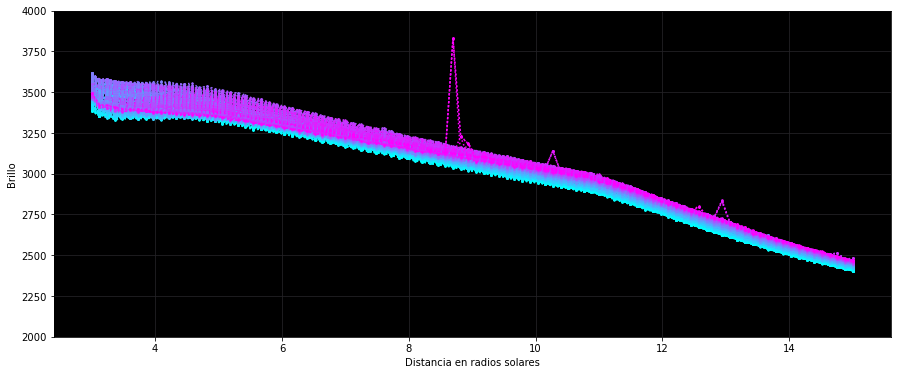

In [166]:
NUM_COLORS = 11
cm = plt.get_cmap('cool')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 1, 1)
for i in range(45):
#for i in [20]:
    for j in range(11):
    #for j in [7]:
        ax.set_prop_cycle(color=[scalarMap.to_rgba(j)])
        ax.plot(radios,
                output[i,j,:],
                marker='.',
                linestyle=':',
                markersize=3)
        
ax.grid(color = "#242326")
ax.set_facecolor('black')
plt.ylim([2000,4000])
plt.xlabel('Distancia en radios solares')
plt.ylabel('Brillo')
plt.show()

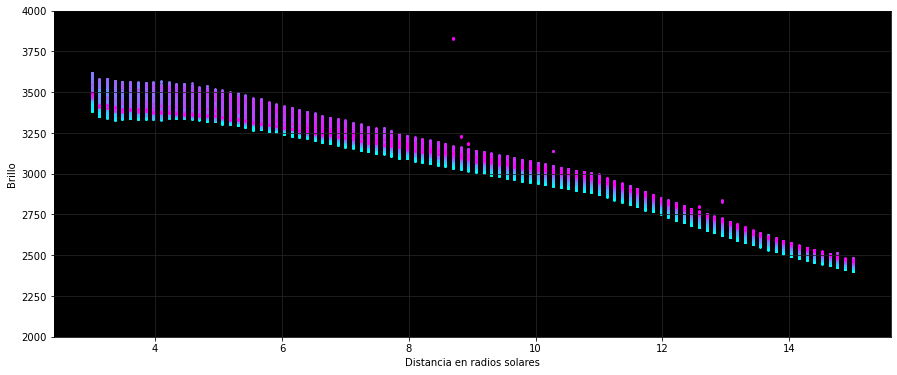

In [167]:
NUM_COLORS = 11
cm = plt.get_cmap('cool')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 1, 1)
for i in range(45):
#for i in [20]:
    for j in range(11):
    #for j in [7]:
        ax.set_prop_cycle(color=[scalarMap.to_rgba(j)])
        ax.scatter(radios,
                output[i,j,:],
                s=3)
        
ax.grid(color = "#242326")
ax.set_facecolor('black')
plt.ylim([2000,4000])
plt.xlabel('Distancia en radios solares')
plt.ylabel('Brillo')
plt.show()

In [168]:
def brilloBackgroundDistancia(imagen_in, imagen_fin, dir_cono_in, dir_cono_fin):
    NUM_COLORS = 11
    cm = plt.get_cmap('cool')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure(figsize = (15,6))
    ax = fig.add_subplot(1, 1, 1)
    for i in np.arange(imagen_in,imagen_fin):
        for j in np.arange(dir_cono_in,dir_cono_fin):
            ax.set_prop_cycle(color=[scalarMap.to_rgba(j)])
            #ax.plot(radios,
            #        output[i,j,:],
            #        #marker='.',
            #        linestyle=':',
            #        markersize=2)
            ax.scatter(radios, output[i,j,:], s=3)
        
    ax.grid(color = "#242326")
    ax.set_facecolor('black')
    plt.ylim([2000,4000])
    plt.xlim([2,16])
    plt.ylabel("Brillo")
    plt.xlabel("Distancia en radios solares")
    plt.show()
    
interact(brilloBackgroundDistancia,
         imagen_in  = widgets.IntSlider(min=0,max=44,step=1, value=0),
         imagen_fin = widgets.IntSlider(min=0,max=44,step=1, value=44),
         dir_cono_in   = widgets.IntSlider(min=0,max=10,step=1, value=0),
         dir_cono_fin  = widgets.IntSlider(min=0,max=10,step=1, value=10))

interactive(children=(IntSlider(value=0, description='imagen_in', max=44), IntSlider(value=44, description='im…

<function __main__.brilloBackgroundDistancia(imagen_in, imagen_fin, dir_cono_in, dir_cono_fin)>

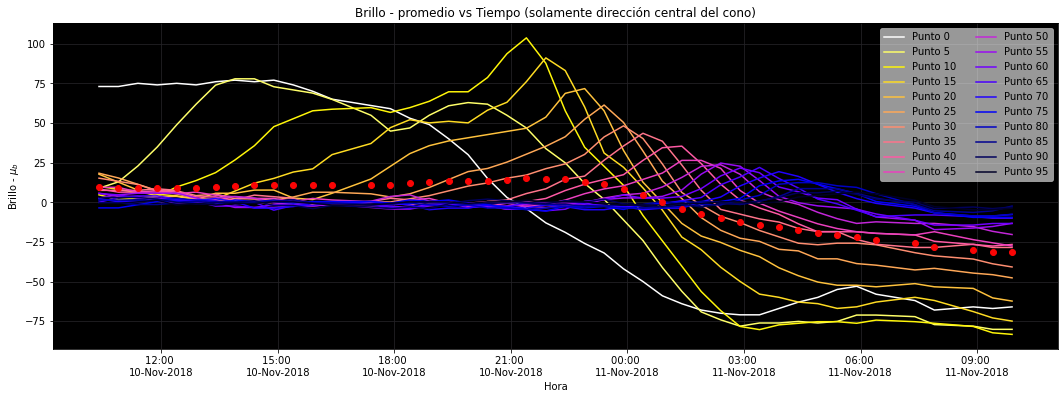

In [169]:
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}

NUM_COLORS = 100
cm = plt.get_cmap('gnuplot2_r')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

promedios=np.array([])

for radio in range(0,n_puntos,5):  # por cada punto en una secuencia range(inicio,fin,intervalo)
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)): # por cada fit en la lista de datos
        mapa = map_s[indice]
        valorRadioCentral = np.append(valorRadioCentral,
                                      [ mapa[ rr[len(rr)//2, 1, radio]][[ rr[len(rr)//2 ,0 ,radio]]] ])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    #iteración de colores
    ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
    #ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    #ax.plot_date(date2num(tiempos), dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    #ax.plot_date(tiempos, valorRadioCentral, linestyle=":")
    
    ax.plot_date(tiempos, 
                 dic_radios["radio_No.%s" %radio],
                 linestyle='solid',
                 markersize=0,
                 label='Punto %s' %radio)
    #plt.xticks(rotation=45,  ha='right') 
    
promedios = np.array([])
for i in range(tama):
    valores = []
    for key, value in dic_radios.items():
        valores = np.append(valores, value[i])
    promedios = np.append(promedios, np.mean(valores))
plt.plot_date(tiempos, promedios,color="#fa0505")
    
date_format = mpl_dates.DateFormatter('%H:%M \n%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
ax.grid(color = "#242326")
ax.legend(ncol=2, framealpha=0.6)
ax.set_facecolor('black')
#fig.autofmt_xdate()
plt.ylabel("Brillo - $\mu_b$")
plt.xlabel('Hora')
plt.title("Brillo - promedio vs Tiempo (solamente dirección central del cono)")
plt.show()

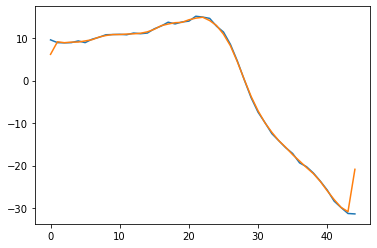

In [170]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

promedios = np.array([])
for i in range(tama):
    valores = []
    for key, value in dic_radios.items():
        valores = np.append(valores, value[i])
    promedios = np.append(promedios, np.mean(valores))

promSuaves = movingaverage(promedios, 3)
plt.plot(np.arange(tama), promedios)
plt.plot(np.arange(tama), promSuaves)
plt.show()

In [171]:
#output = output_py
output.shape

(45, 11, 100)

In [172]:
iti = 0    # imagen al tiempo inicial elegido.
im_ini = 15
try: 
    im_ini
except NameError:
    iti = 0
else:
    iti = im_ini
print('ITI = ', iti)

ITI =  15


In [173]:
limgauss = 16    #vamos a limitar los puntos sobre los que se calc las gauss.s

im_fi = 35
try:
    im_fi 
except NameError:
    limgauss=tama
else:
    limgauss=im_fi 
print('limgauss = ', limgauss)


limgauss =  35


In [174]:
lag=4
try:
    lag_c
except NameError:
    b_corr=0
else:
    b_corr=lag_c

print('b_corr =',  b_corr)

b_corr = 0


## Sacar pa2 y pa2bkg
pa2 = para cada valor de output en i j k (punto, dirección, imagen) se resta el valor mas pequeno de ese punto en esa dirección pero considerando todas la imágenes

pa2bkg = salida del cono menos el promedio de brillo de background para cada punto de los 100 considerando todas las direcciones angulares (`output` - `den_bgs_er`)

In [175]:
pa2=fltarr(n_puntos,11,tama)

In [176]:
pa2bkg=fltarr(n_puntos,11,tama)

In [177]:
for k in range(45):
    for j in range(11):
        for i in range(100):            
            #pa2[k][j][i]   = output[k][j][i] - output[:,j,i].min()
            pa2[k,j,i]     = output[k,j,i]   - output[:,j,i].min()
            #pa2[k][j][i]   = output[k][j][i] - output.T[i][j][:].min()
            pa2bkg[k][j][i]= output[k][j][i] - den_bgs_er[i,0]

In [178]:
den_bgs_er[:,0].min()

2442.5530303030305

In [179]:
den_bgs_er[:,0].max()

3459.7272727272725

In [180]:
output[:,j,i].min()

2460.0

In [181]:
pa2.shape

(45, 11, 100)

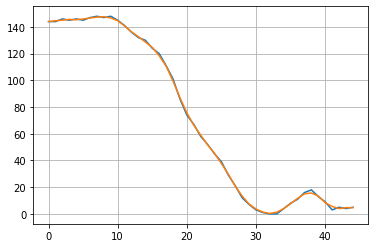

In [182]:
plt.plot(pa2[:,5,0])
#plt.plot(movingaverage(pa2[:,5,0],3))
plt.plot(ndimage.uniform_filter(pa2[:,5,0], size=3, mode="reflect"))
plt.grid()
plt.show()

## IDL
```fortran
for i=1,n_puntos-1,5 do oplot,pa2(i,5,*),color=i*15
```

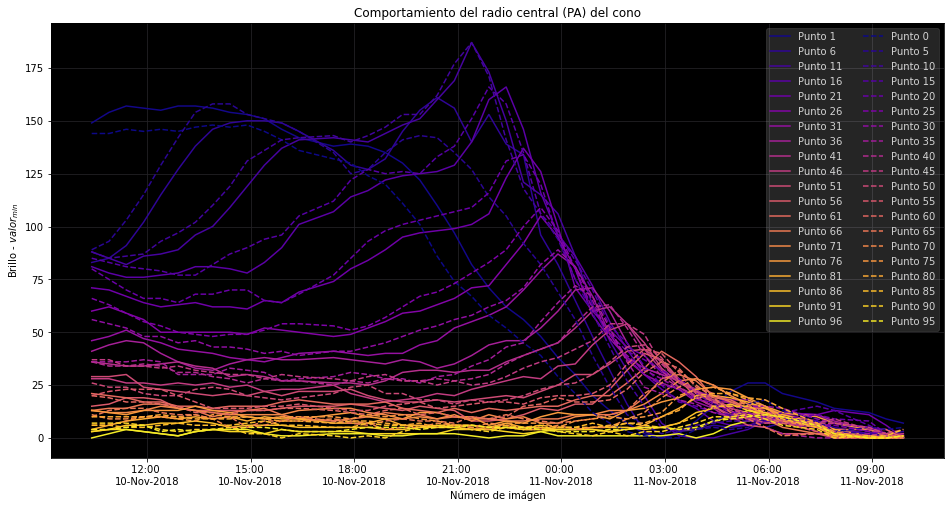

In [183]:
fig = plt.figure(figsize=(16,8))
#cm = plt.get_cmap('nipy_spectral_r')
#cm = plt.get_cmap('gnuplot2_r')
cm = plt.get_cmap('plasma')

N_PUNTOS = 100
cNorm  = colors.Normalize(vmin=0, vmax=N_PUNTOS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
ax = fig.add_subplot(1,1,1)
for i in np.arange(1,n_puntos, 5):
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i)])
    ax.plot(tiempos,
            pa2.T[i,5,:],
           label='Punto %s' %i, markersize=1)
for j in np.arange(0, n_puntos, 5):
    ax.set_prop_cycle(color=[scalarMap.to_rgba(j)])
    ax.plot(tiempos#np.arange(0,45)
            ,pa2bkg.T[j,5,:]-pa2bkg.T[j,5,:].min(), markersize=3, linestyle='--', label='Punto %s' %j)    
    
date_format = mpl_dates.DateFormatter('%H:%M \n%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
ax.grid(color = "#242326")
ax.legend(ncol=2, framealpha=0.15,labelcolor="#d3d3d3")
ax.set_facecolor('black')
#fig.autofmt_xdate()
plt.ylabel("Brillo - $valor_{min}$")
plt.xlabel('Número de imágen')
plt.title('Comportamiento del radio central (PA) del cono')
plt.show()

In [184]:
pa2.shape

(45, 11, 100)

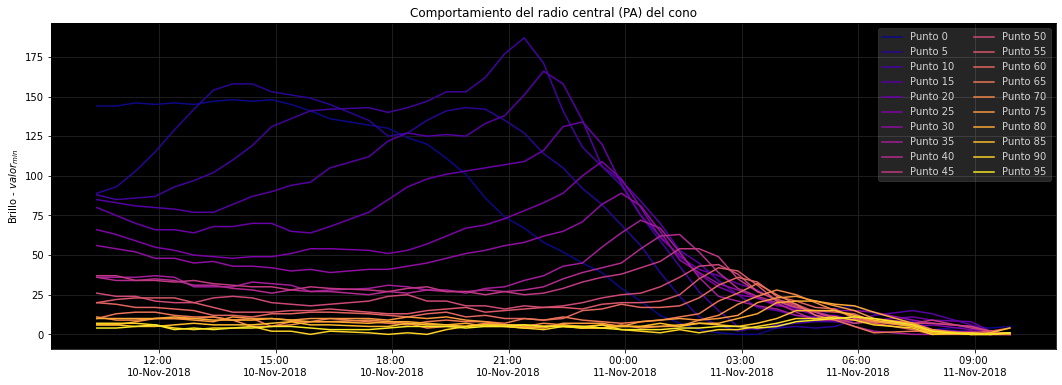

In [210]:
fig = plt.figure(figsize=(18,6))
#cm = plt.get_cmap('nipy_spectral_r')
#cm = plt.get_cmap('gnuplot2_r')
cm = plt.get_cmap('plasma')
N_PUNTOS = 100
cNorm  = colors.Normalize(vmin=0, vmax=N_PUNTOS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
ax = fig.add_subplot(1,1,1)
promedios = np.array([])
for k in range(tama):
    promedios = np.append(promedios,
                          np.mean(pa2[k,5,:]))
promedios2 = np.array([])
for k in range(tama):
    promedios2 = np.append(promedios2,
                          np.mean(pa2[k,5,0:100:5]))
for i in np.arange(0,n_puntos, 5):
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i)])
    ax.plot(tiempos,
            pa2.T[i,5,:],
           label='Punto %s' %i, markersize=1)

#plt.plot(tiempos, promedios, 'w', linestyle='--')
#plt.plot(tiempos, promedios2, 'r', linestyle='--')
date_format = mpl_dates.DateFormatter('%H:%M \n%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
ax.grid(color = "#242326")
ax.legend(ncol=2, framealpha=0.15,labelcolor="#d3d3d3")
ax.set_facecolor('black')
#fig.autofmt_xdate()
plt.ylabel("Brillo - $valor_{min}$")
#plt.xlabel('Número de imágen')
plt.title('Comportamiento del radio central (PA) del cono')
plt.show()

### Para calular los errores:

In [186]:
pa3erm=np.zeros((n_puntos,tama,2))
pa3ero=np.zeros((n_puntos,tama,2))
for i in range(n_puntos):
    for j in range(tama):
        pa3ero[i,j,0] = np.mean(pa2[j,:,i])
        pa3ero[i,j,1] = np.std(pa2[j,:,i])
pa3erm.shape

(100, 45, 2)

In [187]:
pa2.shape

(45, 11, 100)

In [188]:
pa3ero.shape

(100, 45, 2)

In [189]:
pa3ero[0,:,0]

array([111.72727273, 113.09090909, 115.45454545, 116.45454545,
       116.27272727, 113.90909091, 111.81818182, 108.09090909,
       106.18181818, 103.81818182, 101.90909091,  97.27272727,
        93.18181818,  89.27272727,  89.81818182,  89.72727273,
        87.54545455,  82.36363636,  76.72727273,  71.09090909,
        64.54545455,  57.        ,  50.        ,  42.36363636,
        36.36363636,  28.90909091,  21.54545455,  15.45454545,
        12.18181818,   9.72727273,   7.72727273,   5.90909091,
         5.27272727,   6.36363636,   9.18181818,  12.81818182,
        13.90909091,  16.45454545,  17.36363636,  17.27272727,
        14.45454545,  10.90909091,   9.72727273,   7.63636364,
         6.63636364])

In [190]:
normg=np.mean(pa3ero[:,:,0])
pa3erm[:,:,0]=pa3ero[:,:,0]/normg
pa3erm[:,:,1]=pa3ero[:,:,1]/normg

In [191]:
iti

15

In [192]:
iti = 0

In [193]:
pa3er=np.zeros((n_puntos,tama-iti,2))
pa3er[:,:,0]=pa3erm[:,iti:tama,0]
pa3er[:,:,1]=pa3erm[:,iti:tama,1]

In [194]:
pa3er.shape

(100, 45, 2)

In [195]:
tama

45

In [196]:
#delta

In [197]:
tiempo3 = delta[iti:tama]
tama3 = tama - iti
xtemp = tiempo3
xcero = tiempos[0]
xcero

Timestamp('2018-11-10 10:24:00.005000')

In [198]:
len(tiempo3)
len(xtemp)

45

Text(0.5, 0, "Segundos a partir de '2018-11-10 10:24:00.005000'")

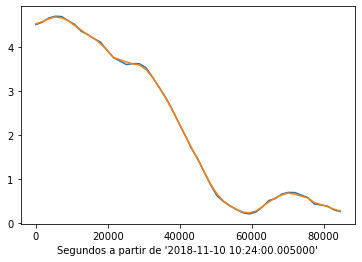

In [199]:
plt.plot(xtemp,pa3er[0,:,0])
plt.plot(xtemp,ndimage.uniform_filter(pa3er[0,:,0], size=3, mode='nearest'))
plt.xlabel("Segundos a partir de '2018-11-10 10:24:00.005000'")

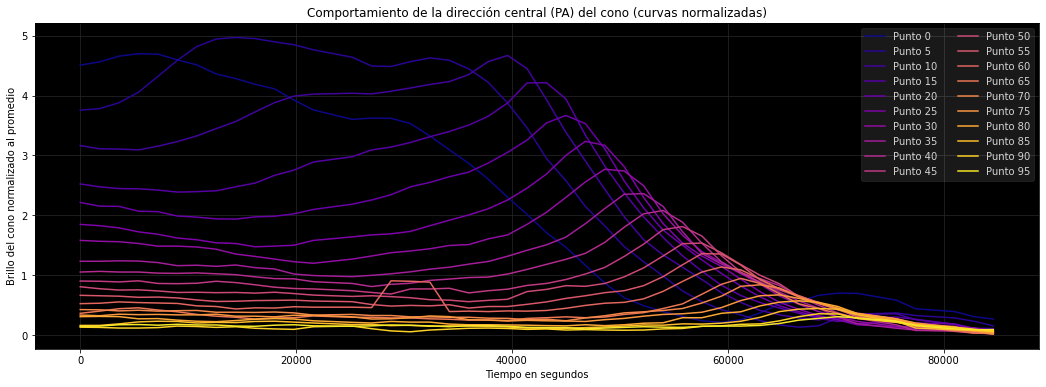

In [213]:
fig = plt.figure(figsize=(18,6))
#cm = plt.get_cmap('nipy_spectral_r')
#cm = plt.get_cmap('gnuplot2_r')
cm = plt.get_cmap('plasma')
N_PUNTOS = 100
cNorm  = colors.Normalize(vmin=0, vmax=N_PUNTOS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
ax = fig.add_subplot(1,1,1)

for i in range(0, n_puntos, 5):
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i)])
    plt.plot(xtemp,pa3er[i,:,0],label='Punto %s' %i, markersize=1)
    #plt.plot(xtemp, ndimage.uniform_filter(pa3er[i,:,0],size=3,mode='nearest'),label='Punto %s' %i, markersize=1)

promedios = np.array([])
#for k in range(tama): ################################################################################
for k in range(pa3er.shape[1]):
    promedios = np.append(promedios,
                          np.mean(pa3er[:,k,0]))


#plt.plot(xtemp, promedios, 'ro')

#plt.plot(xtemp,pa3er[65,:,0], "w^")
ax.grid(color = "#242326")
ax.legend(ncol=2, framealpha=0.1,labelcolor="#d3d3d3")
ax.set_facecolor('black')
#fig.autofmt_xdate()
plt.ylabel("Brillo del cono normalizado al promedio")
plt.xlabel('Tiempo en segundos')
plt.title('Comportamiento de la dirección central (PA) del cono (curvas normalizadas)')
plt.show()

In [83]:
pa3er.shape

(100, 30, 2)

In [84]:
len(xtemp)

30

In [85]:
xtemp

[28800.0,
 30600.0,
 32400.005,
 34200.001,
 36000.0,
 37800.0,
 39600.0,
 41400.0,
 43200.004,
 45000.003,
 46800.001,
 48600.002,
 50400.0,
 52200.0,
 54000.0,
 55800.001,
 57599.999,
 59400.0,
 61200.0,
 63000.001,
 64800.001,
 66600.001,
 68400.005,
 70200.004,
 72000.001,
 75600.0,
 77399.986,
 81000.0,
 82800.005,
 84600.004]

In [86]:
xcero

Timestamp('2018-11-10 10:24:00.005000')

In [87]:
pa3er.shape

(100, 30, 2)

In [88]:
pa3er[:,0,0]


array([3.27573171, 3.76360664, 4.06773647, 4.2388095 , 4.14376893,
       3.97903194, 3.94101571, 3.83330306, 3.66223003, 3.56085342,
       3.5735255 , 3.38344435, 3.15534698, 3.0412983 , 2.85121715,
       2.79419281, 2.50273506, 2.38868637, 2.21761334, 2.12890881,
       1.93249163, 1.85012313, 1.71706633, 1.5459933 , 1.46362481,
       1.30522385, 1.37492027, 1.330568  , 1.23552743, 1.1975112 ,
       1.10880667, 1.14048686, 1.0137661 , 0.91872553, 0.83635703,
       0.89338137, 0.77299665, 0.78566873, 0.86170118, 0.73498042,
       0.69696419, 0.665284  , 0.7983408 , 0.71597231, 0.71597231,
       0.74131646, 0.52589116, 0.60825966, 0.63993985, 0.55123532,
       0.55757135, 0.58925154, 0.59558758, 0.56390739, 0.55757135,
       0.54489928, 0.49421097, 0.50054701, 0.39283436, 0.42451455,
       0.45619474, 0.4815389 , 0.47520286, 0.35481813, 0.3991704 ,
       0.25344152, 5.51235316, 3.72559041, 0.38649833, 0.44985871,
       0.34214606, 0.30412983, 0.30412983, 0.24710549, 0.25344

In [89]:
try: 
    lag
except NameError:
    corrim = 0
else:
    corrim = lag
print('lag = ', lag)

lag =  4


In [90]:
try: 
    numter
except NameError:
    ntms = 5
else:
    ntms = numter
print('numero de terminos en el ajuste de curvas = ', ntms)

numero de terminos en el ajuste de curvas =  5


In [91]:
ctelimg=5

In [92]:
tamano=tama3
l_gauss=limgauss
er_arr=pa3er
x_tmp=xtemp
x_0=xcero
n_radios=n_puntos

if (corrim == 0):
    print('Corrimiento = 0')
    bnd=1
    if l_gauss >= tamano:
        l_gauss=tamano -1
    else:
        l_gauss=l_gauss-1
else:
    bnd=0
    print('Corrimiento = 1')
    if (l_gauss > tamano-ctelimg-1):
        l_gauss=tamano-ctelimg 
    else: 
        l_gauss=l_gauss-1

Corrimiento = 1


In [93]:
l_gauss

25

In [94]:
pasal=np.zeros((l_gauss*2,n_radios))
g_ctes=np.zeros((n_radios,9))  #estamos aumentando el termino de 1er

In [95]:
pasal.shape

(50, 100)

In [96]:
g_ctes.shape

(100, 9)

In [97]:
ytemp=np.zeros((l_gauss+1))  #los tiempos que vamos a usar
sigtemp=np.zeros((l_gauss+1))
tsal=np.zeros((l_gauss*2,n_radios))
tctes=np.zeros((n_radios,4)) #el arreglo de las constantes LOS TRES METODOS
tsig=np.zeros((n_radios,5))  #el arreglo de los errores respectivos y chi2
#cplot=fix(findgen(20)/(20./n_radios)) # para checar si ploteamos o no??
cplot=np.arange(0,100,5) # para checar si ploteamos o no??

In [98]:
for j in range(0,10):
    print(j)

0
1
2
3
4
5
6
7
8
9


In [99]:
bnd

0

In [100]:
x_tmp[0:(l_gauss+1)+0]

[28800.0,
 30600.0,
 32400.005,
 34200.001,
 36000.0,
 37800.0,
 39600.0,
 41400.0,
 43200.004,
 45000.003,
 46800.001,
 48600.002,
 50400.0,
 52200.0,
 54000.0,
 55800.001,
 57599.999,
 59400.0,
 61200.0,
 63000.001,
 64800.001,
 66600.001,
 68400.005,
 70200.004,
 72000.001,
 75600.0]

In [101]:
cte1=0
er_arr[0,cte1:l_gauss+1+cte1,0]

array([3.27573171, 3.14901094, 2.97160188, 2.75617658, 2.56609544,
       2.37601429, 2.15425296, 1.95149974, 1.65370595, 1.38759235,
       1.09613459, 0.85536515, 0.69696419, 0.58291551, 0.55123532,
       0.57657947, 0.53856324, 0.51321909, 0.41817852, 0.43085059,
       0.50054701, 0.51955513, 0.68429212, 0.72864438, 0.75398854,
       0.665284  ])

In [102]:
tol=np.arange(10)
min(tol)

0

# Interpolar un arreglo
```python
interpfunc = interpolate.interp1d(b,a, kind='linear')
x=interpfuc(c)
```

C:\Users\angel\AppData\Local\Temp\ipykernel_12956\1093869551.py:17: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


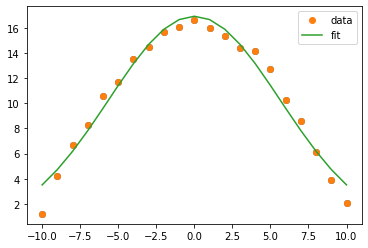

In [103]:
#from __future__ import print_function
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

# Define the Gaussian function
#F(x) = A0*EXP(-z^2/2) + A3 + A4*x
#z=(x-A)/B
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]

#fit_y = Gauss(xdata, fit_A, fit_B)
fit_y = Gauss(xdata, *parameters)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

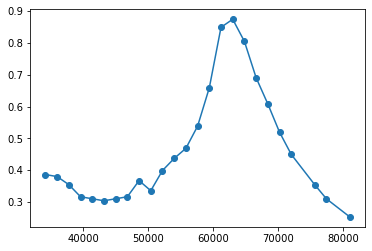

In [104]:
from math import floor as floor
j=70
mfct=(tamano-l_gauss)/n_radios
cte1=floor(j*mfct)
xt=x_tmp[cte1:l_gauss+cte1]
ytemp   =er_arr[j, cte1:l_gauss+cte1, 0]
sigtemp =er_arr[j, cte1:l_gauss+cte1, 1]
#INTERPOLATION
x_sal=(np.arange(l_gauss*2)+1)*(max(xt)-min(xt))/(l_gauss*2)+min(xt)
interpolFunction = interpolate.interp1d(xt, ytemp, kind='quadratic')#, bounds_error=False, fill_value='extrapolate')
inter=interpolFunction(x_sal)

siginterFunction = interpolate.interp1d(xt, sigtemp, kind='quadratic')#, bounds_error=False, fill_value='extrapolate')
siginter = siginterFunction(x_sal)

plt.plot(xt, ytemp, marker='o')
#plt.plot(xt, sigtemp, marker='.')
#plt.plot(x_sal, inter, marker='.')
plt.show()

C:\Users\angel\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 -1.87836822e+00
  8.17264751e-05 -6.77696053e-10]


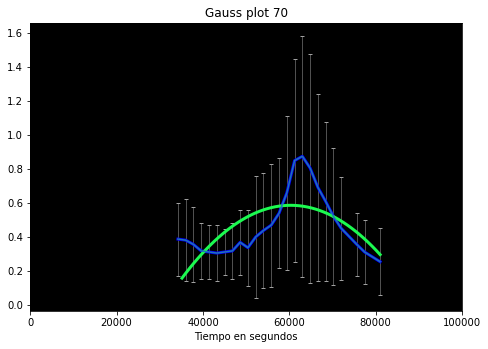

In [105]:
def fit_func(x, a0, a1, a2, a3, a4, a5):
    z = (x - a1) / a2
    ez = np.exp(-z**2 / 2)
    y = a0 * ez + a3 + a4 * x + a5 * x**2
    return y

parameters, covariance = curve_fit(fit_func, x_sal, inter)
#parameters, covariance = curve_fit(fit_func, xt[1:], ytemp[1:])
print(parameters)
#print(covariance)
fitdata = fit_func(x_sal, *parameters)

fig = plt.figure(figsize=(6,4), frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
#upperlimits = [True, False] * 22#floor(len(xt)/2)
#lowerlimits = [False, True] * 22#floor(len(xt)/2)
#ax.errorbar(xt, ytemp, sigtemp, ecolor="#a1a1a1", barsabove=False, uplims=upperlimits, lolims=lowerlimits,)
ax.errorbar(xt, ytemp, sigtemp, ecolor="#a1a1a1", barsabove=False, elinewidth = 0.5,  capsize=2)
ax.plot(xt, ytemp, 'b-', x_sal, fitdata, '#1bfa50', linewidth=3)
ax.set_facecolor('black')
plt.title("Gauss plot {}".format(j))
plt.xlabel("Tiempo en segundos")
plt.xlim((0,100000))
plt.show()

In [106]:
rend = np.linspace(5, 10, 30)
print(np.where(rend == rend.max()))

(array([29], dtype=int64),)


In [107]:
c = np.polyfit(x_sal, inter, deg=2)
c

array([-6.77696048e-10,  8.17264745e-05, -1.87836821e+00])

In [108]:
np.arange(40,45)

array([40, 41, 42, 43, 44])

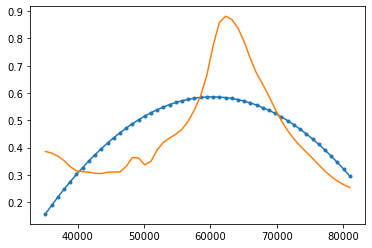

In [109]:
a0 = c[0]
a1 = c[1]
a2 = c[2]
yf = np.array([])
for x in x_sal:
    yf = np.append(yf, a0*x**2 + a1*x + a2)
plt.plot(x_sal, yf, marker=".")
#plt.plot(x_sal, a0*x_sal**2 + a1*x_sal + a2, "y:")
plt.plot(x_sal, inter)
plt.show()

In [110]:
x = x_sal
yd = inter - yf
imax = np.where(yd == yd.max())
for i in imax:
    imax = int(i)
ymax = yd[imax]
xmax = x_sal[imax]
imin = np.where(yd == yd.min())
for i in imin:
    imin = int(i)
ymin = yd[imin]
xmin = x_sal[imin]
print(ymax)
print(imax)
print(xmax)
print(ymin)
#if abs(ymax) gt abs(ymin) then i0=imax else i0=imin ;emiss or absorp?
if abs(ymax) > abs(ymin):
    i0 = imax
else:
     i0 = imin   
n = len(inter)
#i0 = i0 > 1 < (n-2)  #;never take edges
dy = yd[i0]			#;diff between extreme and mean
Delta = dy/np.exp(1.)		#;1/e value

print(dy)
print(Delta)

0.29825800149883497
29
62280.000400000004
-0.17900598024259268
0.29825800149883497
0.10972298691630263


In [111]:
print(i0)
print(n)

29
50


In [112]:
print(yd[i0])
print(x[i0])
print(i)

0.29825800149883497
62280.000400000004
[16]


In [113]:
i=0
while (i0 + i + 1 < n) and (i0 - i > 0) and (abs(yd[i0+i]) > abs(Delta)) and (abs(yd[i0-i]) > abs(Delta)):
    print(i)
    i += 1
print(i)


0
1
2
3


In [114]:
def emissAbsorb():
    i=0
    while (i0 + i + 1 < n) and (i0 - i > 0) and (abs(yd[i0+i]) > abs(Delta)) and (abs(yd[i0-i]) > abs(Delta)):
        i += 1
    return i
emissAbsorb()

3

In [115]:
a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
a

[0.29825800149883497, 62280.000400000004, 2807.9999399999942]

In [116]:
c

array([-6.77696048e-10,  8.17264745e-05, -1.87836821e+00])

In [117]:
nt = 5
if nt > 3: a = np.append(a, c[2])
if nt > 4: a = np.append(a, c[1])
if nt > 5: a = np.append(a, c[0])
a

array([ 2.98258001e-01,  6.22800004e+04,  2.80799994e+03, -1.87836821e+00,
        8.17264745e-05])

In [118]:
def gauss_funct(x,a0,a1,a2,a3,a4):
    if (a2 != 0):
        z = (x-a1)/a2
        ez = np.exp(-z**2/2)
    else:
        z = 100
        ez = 0.0
    f = a0*ez + a3 + a4*x
    return f


In [119]:
def gauss_funct3(x,a0,a1,a2):
    if (a2 != 0):
        z = (x-a1)/a2
        ez = np.exp(-z**2/2)
    else:
        z = 100
        ez = 0.0
    f = a0*ez
    return f
    
def gauss_funct4(x,a0,a1,a2,a3):
    if (a2 != 0):
        z = (x-a1)/a2
        ez = np.exp(-z**2/2)
    else:
        z = 100
        ez = 0.0
    f = a0*ez + a3
    return f
    
def gauss_funct5(x,a0,a1,a2,a3,a4):
    if (a2 != 0):
        z = (x-a1)/a2
        ez = np.exp(-z**2/2)
    else:
        z = 100
        ez = 0.0
    f = a0*ez + a3 + a4*x
    return f

def gauss_funct6(x,a0,a1,a2,a3,a4,a5):
    if (a2 != 0):
        z = (x-a1)/a2
        ez = np.exp(-z**2/2)
    else:
        z = 100
        ez = 0.0
    f = a0*ez + a3 + a4*x + a5*x**2
    return f


In [120]:
nt = 5 ##############################################################################
if nt == 3:
    i = emissAbsorb()
    a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
    gauss_funct = gauss_funct3
    
elif nt == 4:
    i = emissAbsorb()
    a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
    a = np.append(a, c[2])
    gauss_funct = gauss_funct4
                  
elif nt == 5:
    i = emissAbsorb()
    a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
    a = np.append(a, c[2])
    a = np.append(a, c[1])
    gauss_funct = gauss_funct5
    
elif nt == 6:
    i = emissAbsorb()
    a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
    a = np.append(a, c[2])
    a = np.append(a, c[1])
    a = np.append(a, c[0])
    gauss_funct = gauss_funct6
    

In [121]:
#popt, pcov = curve_fit(gauss_funct, x_sal, inter, p0=a, sigma=siginter, absolute_sigma=True)
popt, pcov = curve_fit(gauss_funct, 
                       x_sal, 
                       inter, 
                       p0=a)
for i in popt:
    print(i)

0.5238781439799881
63432.46391000693
5002.315217848131
0.38224590551418214
-1.1025405828275885e-06


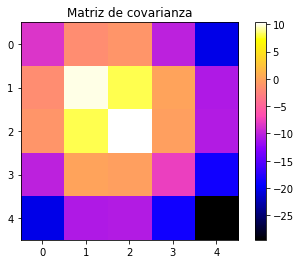

In [122]:
cm = plt.get_cmap('gnuplot2')
plt.imshow(np.log(abs(pcov)), cmap=cm)
plt.colorbar()
plt.title("Matriz de covarianza")
plt.show()

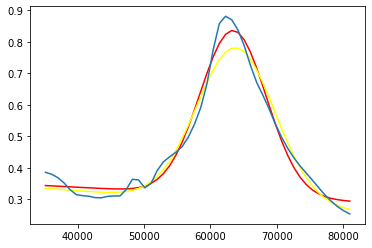

In [123]:
popt2, pcov2 = curve_fit(gauss_funct, 
                         x_sal, 
                         inter, 
                         p0=a, 
                         sigma=siginter, 
                         absolute_sigma=True)
yhat = gauss_funct(x_sal, *popt)
yhatSigmas = gauss_funct(x_sal, *popt2)
plt.plot(x_sal, yhat, "r-")
plt.plot(x_sal, yhatSigmas, "#ffff00")  
plt.plot(x_sal, inter)
plt.show()

In [124]:
yhat = gauss_funct(x_sal, *popt)

In [125]:
sum(inter)

22.928140693233455

In [126]:
sum(yhat)

22.928140696660012

In [127]:
sum(yhatSigmas)

22.64580422561612

In [128]:
yhatSigmas = yhatSigmas/sum(yhatSigmas)*sum(inter)
sum(yhatSigmas)

22.928140693233455

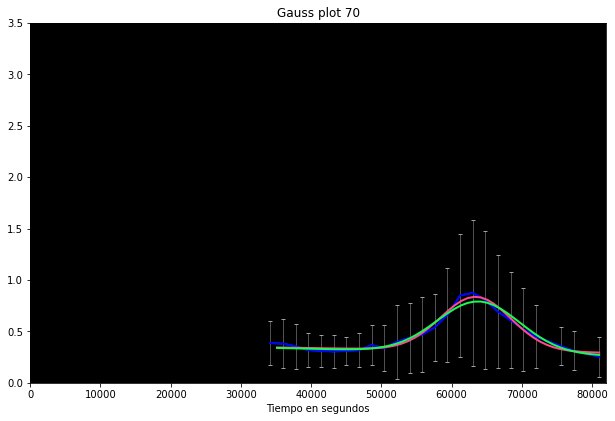

In [129]:
fig = plt.figure(figsize=(8,5), frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.errorbar(xt, ytemp, sigtemp, ecolor="#a1a1a1", barsabove=True, elinewidth = 0.5,  capsize=2)
ax.plot(xt, ytemp, 'b', x_sal, yhat, '#fd4c8a', linewidth=2)
ax.plot(x_sal, yhatSigmas, "#1bfa50", linewidth=2, label="No Sigmas")
#ax.plot(x_sal, yf, "r:")
ax.set_facecolor('black')
plt.title("Gauss plot {}".format(j))
plt.xlabel("Tiempo en segundos")
plt.xlim((0,82000))
plt.ylim((0,3.5))
plt.show()

In [130]:
r = inter - yhatSigmas
chisq = sum((r / siginter)**2)
chisq

0.4899935598284198

In [131]:
# python calcs weights
import scipy.stats as st
chi2 , p = st.chisquare(inter, yhat, ddof=len(inter)-5)
print(chi2)
print(p)

0.09642126053373745
0.9988745523084924


In [132]:
# give sigmas manually (IDL mygaussfit.pro)
import scipy.stats as st
chi2 , p = st.chisquare(inter, yhatSigmas, ddof=len(inter)-5)
print(chi2)
print(p)

0.10924355793125864
0.9985614560323542


In [133]:
sum(r**2)

0.06389445315371244

In [134]:
chisq = np.sum((r/siginter)**2)
df = len(inter) - 2
print("chisq =",chisq,"df =",df)

chisq = 0.4899935598284198 df = 48


In [135]:
len(yhat)
print(len(inter))
chi2 = sum((inter-yhat)**2/yhat)
print(chi2)
print(len(sigtemp))


50
0.09642126053373745
25


In [136]:
print(type(ytemp))
print(type(inter))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [137]:
np.linspace(23, 25, 10)

array([23.        , 23.22222222, 23.44444444, 23.66666667, 23.88888889,
       24.11111111, 24.33333333, 24.55555556, 24.77777778, 25.        ])

In [138]:
#nt = 5 ##############################################################################
def nTerminos(nt):
    #glob: i
    #glob: a
    if nt == 3:
        i = emissAbsorb()
        a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
        function = gauss_funct3
    
    elif nt == 4:
        i = emissAbsorb()
        a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
        a = np.append(a, c[2])
        function = gauss_funct4
                  
    elif nt == 5:
        i = emissAbsorb()
        a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
        a = np.append(a, c[2])
        a = np.append(a, c[1])
        function = gauss_funct5
    
    elif nt == 6:
        i = emissAbsorb()
        a = [ yd[i0], x[i0], abs(x[i0]-x[i0+i])]
        a = np.append(a, c[2])
        a = np.append(a, c[1])
        a = np.append(a, c[0])
        function = gauss_funct6
    return function, a
    

In [139]:
def distanciasJ(j, lGauss):
    #j=70
    l_gauss = lGauss
    mfct=(tamano-l_gauss)/n_radios
    cte1=floor(j*mfct)
    xt=x_tmp[cte1:l_gauss+cte1]
    ytemp   =er_arr[j, cte1:l_gauss+cte1, 0]
    sigtemp =er_arr[j, cte1:l_gauss+cte1, 1]
    #INTERPOLATION
    #x_sal=(np.arange(l_gauss*2)+1)*(max(xt)-min(xt))/(l_gauss*2)+min(xt)
    x_sal=(np.arange(l_gauss*2)+1)*(max(xt)-min(xt))/(l_gauss*2)+min(xt)
    
    interpolFunction = interpolate.interp1d(xt, ytemp, kind='quadratic')#, bounds_error=False, fill_value='extrapolate')
    inter=interpolFunction(x_sal)
    siginterFunction = interpolate.interp1d(xt, sigtemp, kind='quadratic')#, bounds_error=False, fill_value='extrapolate')
    siginter = siginterFunction(x_sal)
    
    return xt, x_sal, inter, ytemp, sigtemp, siginter


In [140]:
l_gauss
#cte1

25

In [141]:
def ajusteGauss(nt, j, ySigmaNoErrorBars, ySigma, lGauss):
    xt, x_sal, inter, ytemp, sigtemp, siginter = distanciasJ(j, lGauss)
    gauss_funct, a = nTerminos(nt)

    fig = plt.figure(figsize=(16,4), frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.errorbar(xt, ytemp, sigtemp, color='b', ecolor="#a1a1a1", barsabove=True, elinewidth = 1,  capsize=2)
    if ySigma == True:
        popt2, pcov2 = curve_fit(gauss_funct, 
                         x_sal, 
                         inter, 
                         p0=a, 
                         sigma=siginter, 
                         absolute_sigma=True)
        yhatSigmas = gauss_funct(x_sal, *popt2)
        ax.plot(x_sal, yhatSigmas, "#1bfa50", linewidth=1, label="No Sigmas")

    if ySigmaNoErrorBars == True:
        popt, pcov = curve_fit(gauss_funct, 
                       x_sal, 
                       inter, 
                       p0=a)
        yhat = gauss_funct(x_sal, *popt)
        #ax.plot(xt, ytemp, 'b', x_sal, yhat, '#fd4c8a', linewidth=2)    
        ax.plot(x_sal, yhat, '#fd4c8a', linewidth=1)    
    ax.set_facecolor('black')
    plt.title("Gauss plot {}".format(j))
    plt.xlabel("Tiempo en segundos")
    plt.xlim((0,84000))
    plt.ylim((0,5))
    plt.show()
    
interact(ajusteGauss,
         nt  = widgets.IntSlider(min=3,max=6,step=1, value=5),
         j = widgets.IntSlider(min=5, max=95, step=5, value=45),
         ySigmaNoErrorBars = widgets.Checkbox(value=False,description='Use python fit',disabled=False,indent=False),
         ySigma = widgets.Checkbox(value=True,description='Use IDL fit (give standar deviations)',disabled=False,indent=False),
         lGauss = widgets.IntSlider(min=0, max=30, step=1, value=16)
)

interactive(children=(IntSlider(value=5, description='nt', max=6, min=3), IntSlider(value=45, description='j',…

<function __main__.ajusteGauss(nt, j, ySigmaNoErrorBars, ySigma, lGauss)>

In [142]:
len(xt)

25

In [143]:
len(ytemp)

25

In [144]:
if bnd == 0: #then begin
    mfct=(tamano-l_gauss)/n_radios
    for j in range(n_radios):# do begin      	#para cada j*R
        cte1=floor(j*mfct)
        xt=x_tmp[cte1:l_gauss+cte1]
        ytemp=er_arr[j,cte1:l_gauss+cte1,0]
        sigtemp=er_arr[j,cte1:l_gauss+cte1,1]
        #INTERPOLATION
        #   x_sal=indgen(l_gauss*2)*(max(xt)-min(xt))/(l_gauss*2)+min(xt)
        x_sal=(np.arange(l_gauss*2)+1)*(max(xt)-min(xt))/(l_gauss*2)+min(xt)
        #inter=interpol(ytemp,xt,x_sal,/lsquadratic)
        interpolFunction = interpolate.interp1d(ytemp,xt, kind='quadratic')
        inter=interpolFunction(x_sal)
        #siginter=interpol(sigtemp,xt,x_sal,/lsquadratic)
        siginterFunction = interpolate.interp1d(sigtemp,xt, kind='quadratic')
        siginter = siginterFunction(x_sal)

        if j == 0:
            gaussiana5=mygaussfit(double(x_sal),double(inter),$#estimates=est,$
            ctes5,nterms=5,weights=1./(siginter)^2,sig5,chi25)
            est5=ctes5

            gaussiana=mygaussfit(double(x_sal),double(inter),$
            ctes,nterms=ntms,weights=1./(siginter)^2,sig,chi2)
            est=ctes
        endif

        gaussiana5=mygaussfit(double(x_sal),double(inter),estimates=est5,$
        ctes5,nterms=5,weights=1./(siginter)^2,sig5,chi25)
        gaussiana=mygaussfit(double(x_sal),double(inter),estimates=est,$
        ctes,nterms=ntms,weights=1./(siginter)^2,sig,chi2)

        #  print,'diferencias entre las gaussianas ',ctes-ctes5
        est=ctes
        est5=ctes5
        tsal(*,j)=x_sal#+x_0 #es una prueba para x_0 en ex
        tctes(j,0)=ctes(0) &  tctes(j,1)=ctes(1)
        tctes(j,2)=ctes(2) &  tctes(j,3)=ctes(3)
        tsig(j,0)=sig(0) &  tsig(j,1)=sig(1)
        tsig(j,2)=sig(2) &  tsig(j,3)=sig(3)
        tsig(j,4)=chi2 
        pasal(*,j)=gaussiana

        #Plots
        if where(cplot == j) > 0:
            nomplot=string(j)
            plot,xt/1e4,ytemp,/nodata,titl='Gauss Plot'+nomplot
            oploterr,xt/1e4,ytemp,sigtemp,psym=-1,/yno,color=200
            #xrange=minmax(x_tmp(0:l_gauss+ctelimg-1)),    xsty=1
            oploterr,x_sal/1e4,inter,siginter,psym=1,color=40
            oplot,x_sal/1e4,gaussiana5,color=80,thick=2  #rojo
            oplot,x_sal/1e4,gaussiana,color=150,thick=2  
        endif
    endfor

elif bnd == 1:
    xt=x_tmp(0:l_gauss)
    x_sal=(indgen(l_gauss*2)+1)*(max(xt)-min(xt))/(l_gauss*2)+min(xt)
    print,xt
    print,x_sal
    for j in range(n_radios):# do begin              #para cada j*Ro   
        ytemp=double(er_arr(j,0:l_gauss,0))
        sigtemp=double(er_arr(j,0:l_gauss,1))
        #INTERPOLATION
        inter=interpol(ytemp,xt,x_sal,/lsquadratic)
        siginter=interpol(sigtemp,xt,x_sal,/lsquadratic)
        if j == 0:# then begin
            gaussiana5=mygaussfit(double(x_sal),double(inter),$#estimates=est,$
            ctes5,nterms=5,weights=1./(siginter)^2,sig5,chi25)
            est5=ctes5
            gaussiana=mygaussfit(double(x_sal),double(inter),$
            ctes,nterms=ntms,weights=1./(siginter)^2,sig,chi2)
            est=ctes
        endif
        gaussiana5=mygaussfit(double(x_sal),double(inter),estimates=est5,$
        ctes5,nterms=5,weights=1./(siginter)^2,sig5,chi25)
        gaussiana=mygaussfit(double(x_sal),double(inter),estimates=est,$
        ctes,nterms=ntms,weights=1./(siginter)^2,sig,chi2)
        est=ctes
        est5=ctes5
        tsal(*,j)=x_sal#+x_0  #ver nota arriba sobre x_0
        tctes(j,0)=ctes(0) &  tctes(j,1)=ctes(1)
        tctes(j,2)=ctes(2) &  tctes(j,3)=ctes(3)
        #  tctes(j,0)=ctes5(0) &  tctes(j,1)=ctes5(1)
        #  tctes(j,2)=ctes5(2) &  tctes(j,3)=ctes5(3)
        #  tctes(j,4)=ctes5(4) 

        tsig(j,0)=sig(0) &  tsig(j,1)=sig(1)
        tsig(j,2)=sig(2) &  tsig(j,3)=sig(3)
        tsig(j,4)=chi2 
        pasal(*,j)=gaussiana
        #Plots
        if where(cplot == j) > 0:# then begin
            nomplot=string(j)
            plot,xt/1e4,ytemp,/nodata,titl='Gauss Plot'+nomplot
            #   oploterr,xt/1e4,ytemp,sigtemp,psym=-1,/yno,xrange=minmax(x_tmp(0:l_gauss+9)),$
            oploterr,xt/1e4,ytemp,sigtemp,psym=-1,/yno,color=200
            #,xrange=minmax(x_tmp(0:l_gauss+ctelimg-1)),  xsty=1
            oploterr,x_sal/1e4,inter,siginter,psym=1,color=10
            oplot,x_sal/1e4,gaussiana5,color=40,thick=2  #rojo
            oplot,x_sal/1e4,gaussiana,color=80,thick=2  
            #oplot,x_sal/1e4,extremaf,color=200,thick=3,linesty=0
        endif
    endfor
endif


SyntaxError: invalid syntax (3696288099.py, line 19)